# 2017331026
# Here we represent Lab 4 tasks Support Vector Machine and SVM with Kernels :


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# **TASK 1 :**

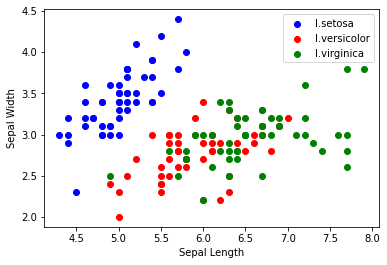

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

features=iris.data
labels=iris.target
import matplotlib.pyplot as plt
labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']

colors=['blue', 'red', 'green']
for i in range(len(colors)):
    px=features[:,0][labels==i]
    py=features[:,1][labels==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(labels_names)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

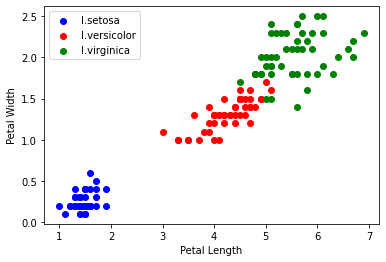

In [ ]:
for i in range(len(colors)):
    px=features[:,2][labels==i]
    py=features[:,3][labels==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(labels_names)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

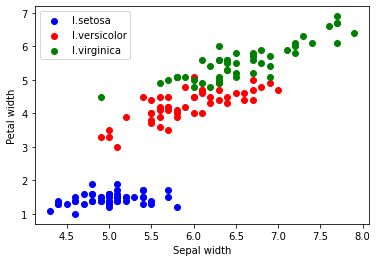

In [ ]:
for i in range(len(colors)):
    px=features[:,0][labels==i]
    py=features[:,2][labels==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(labels_names)
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.show()

In [ ]:
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# **TASK 2:**

In [ ]:
from sklearn import datasets

def Load_XY():
  iris = datasets.load_iris()

  X = iris["data"][:, (2, 3)]

  Y = iris.target
  return X,Y

In [ ]:
X,Y=Load_XY()

# ***TASK 2a:***

# **SVM**

***For Basic SVM:***

In [ ]:
from sklearn.svm import SVC
model = SVC()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

***For SVM With Kernels:***

In [ ]:
from sklearn import svm

# SVM regularization parameter
C = 1.0  

# SVC with a Linear Kernel
svc = svm.SVC(kernel='linear', C=C)

# Gaussian Radial Bassis Kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C)

# SVC with 3rd degree poynomial Kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C)

# SVC Linear
lin_svc = svm.LinearSVC(C=C)

# TASK 2b:

In [ ]:
def fit_Model(model):
  model = model.fit(X_train,Y_train)
  return model

In [ ]:
model = fit_Model(model)
svc = fit_Model(svc)
rbf_svc = fit_Model(rbf_svc)
poly_svc = fit_Model(poly_svc)
lin_svc = fit_Model(lin_svc)


# Task 2C and 2D:

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Get predictions
def get_prediction(model):
  predicted = model.predict(X_test)
  expected = Y_test
  labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']
  print('Accuracy Score:', accuracy_score(Y_test, predicted))
  print('Confusion Matrix:\n', confusion_matrix(Y_test, predicted))
  print(metrics.classification_report(
      Y_test, predicted, target_names=labels_names))

  # Compare results
  print(metrics.accuracy_score(expected,predicted))
  return predicted

In [ ]:
from sklearn.metrics import plot_confusion_matrix
def confusionM(classifier,input_data,target_data,prediction) :
  print()
  print('confusion matrix : \n')
  # print(confusion_matrix(target_data, prediction))
  plot_confusion_matrix(classifier, input_data, target_data)  
  plt.show()
  print()

# Prediction Using Basic SVM:

Accuracy Score: 1.0
Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        15
I.versicolor       1.00      1.00      1.00        11
 I.virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

1.0

confusion matrix : 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


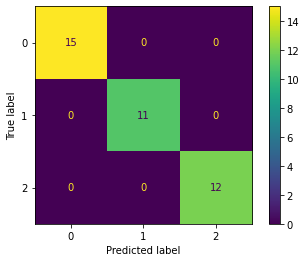

In [ ]:
pred = get_prediction(model)
confusionM(model,X_test,Y_test,pred)

# Prediction Using linear Kernel:

Accuracy Score: 0.9736842105263158
Confusion Matrix:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        15
I.versicolor       1.00      0.91      0.95        11
 I.virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

0.9736842105263158

confusion matrix : 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


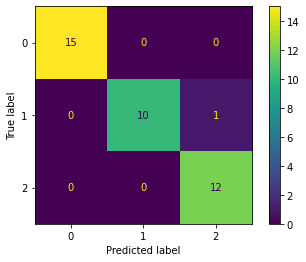

In [ ]:
pred2 = get_prediction(svc)
confusionM(svc,X_test,Y_test,pred2)

# Prediction Using RBF Kernel:

Accuracy Score: 0.9736842105263158
Confusion Matrix:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        15
I.versicolor       1.00      0.91      0.95        11
 I.virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

0.9736842105263158

confusion matrix : 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


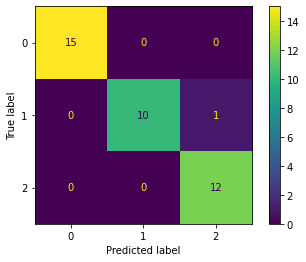

In [ ]:
pred3 = get_prediction(rbf_svc)
confusionM(rbf_svc,X_test,Y_test,pred3)

# Prediction Using polynomial Kernel:

Accuracy Score: 0.9736842105263158
Confusion Matrix:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        15
I.versicolor       1.00      0.91      0.95        11
 I.virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

0.9736842105263158

confusion matrix : 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


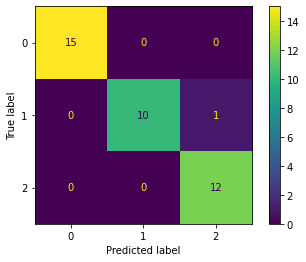

In [ ]:
pred4 = get_prediction(poly_svc)
confusionM(poly_svc,X_test,Y_test,pred4)

# Prediction Using Linear SVM:

Accuracy Score: 0.9473684210526315
Confusion Matrix:
 [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        15
I.versicolor       0.91      0.91      0.91        11
 I.virginica       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

0.9473684210526315

confusion matrix : 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


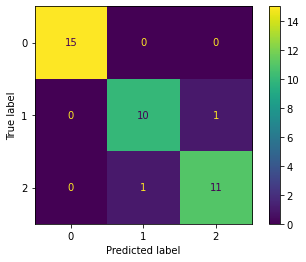

In [ ]:
pred5 = get_prediction(lin_svc)
confusionM(lin_svc,X_test,Y_test,pred5)

# **TASK 3**

Task 3a:

In [ ]:
import numpy as np
def mesh_grid(X_train):
  h = 0.02
  x_min=X_train[:, 0].min() - 1
  x_max =X_train[:, 0].max() + 1
  y_min = X_train[:, 1].min() - 1
  y_max = X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
  return xx,yy

In [ ]:
xx,yy=mesh_grid(X_train)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
def SVM_with_Kernel(titles,xx,yy,i,kernelName): 
  plt.figure(figsize=(10,10))
  Z = kernelName.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
  
  plt.xlabel('Petal length')
  plt.ylabel('Petal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])
  plt.show()

  # return predicted , expected
      

# **BASIC SVM**

In [ ]:
# title for the plots
titles = ['Basic SVM',
          'SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: linewidths is ignored by contourf
  import sys


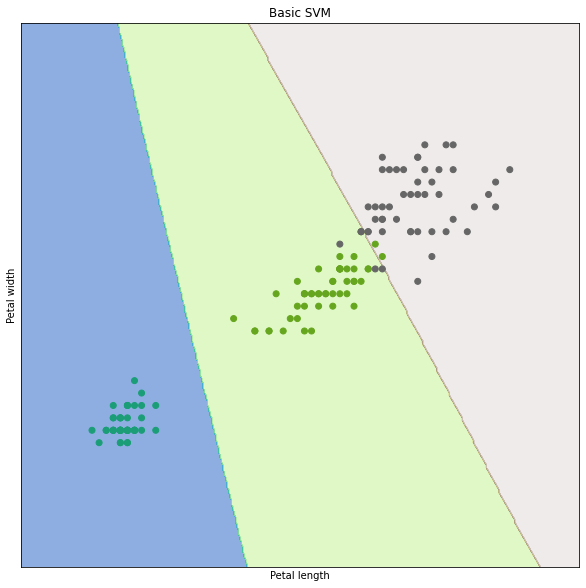

In [ ]:
SVM_with_Kernel(titles,xx,yy,0,model)

# **SVM WITH KERNELS**

# **SVM WITH LINEAR KERNEL**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: linewidths is ignored by contourf
  import sys


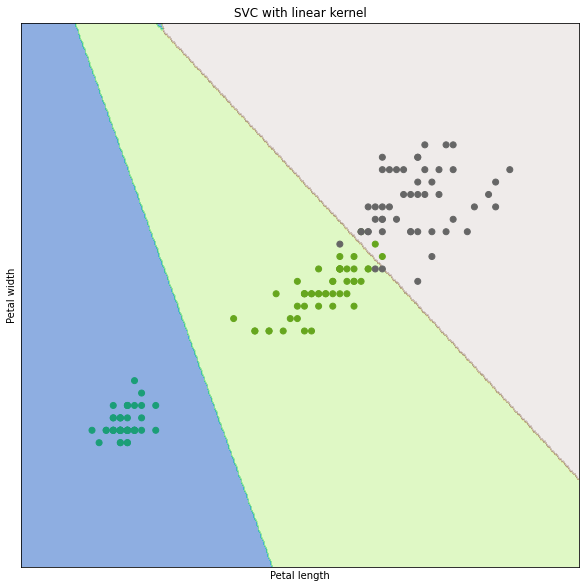

In [ ]:
SVM_with_Kernel(titles,xx,yy,1,svc)

# **LinearSVM**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: linewidths is ignored by contourf
  import sys


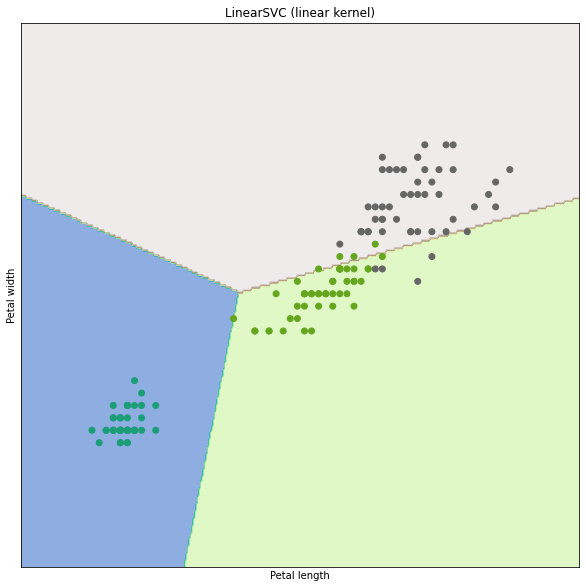

In [ ]:
SVM_with_Kernel(titles,xx,yy,2,lin_svc)

# **KERNEL RBF**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: linewidths is ignored by contourf
  import sys


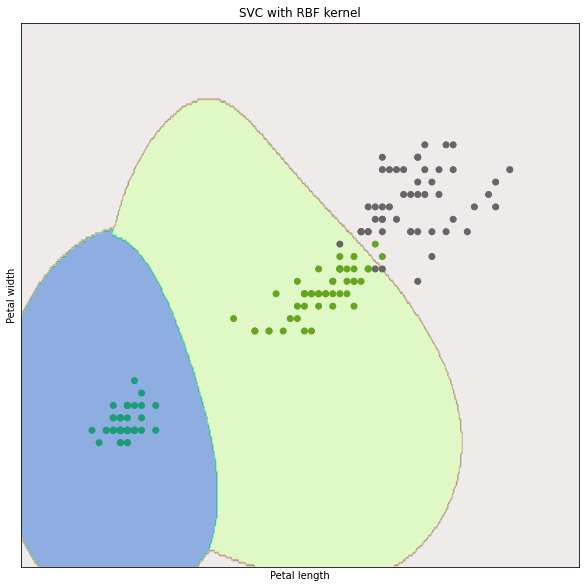

In [ ]:
SVM_with_Kernel(titles,xx,yy,3,rbf_svc)

# **KERNEL POLY**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: linewidths is ignored by contourf
  import sys


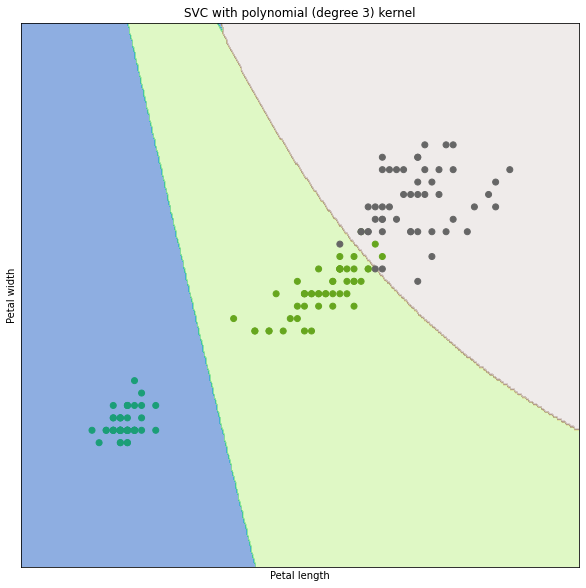

In [ ]:
SVM_with_Kernel(titles,xx,yy,4,poly_svc)

# TASK 4:

# **Hyperparameter tuning**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

def Hyperparameter_Tuning(X,Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
  param_grid = {'C':[0.1,1,10,100], 'kernel': ['linear', 'rbf','poly'], 'gamma':[0.01, 0.1, 1, 10]}
  tuned_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
  tuned_grid = tuned_grid.fit(X_train, Y_train)
  return tuned_grid

In [ ]:
tuned_grid = Hyperparameter_Tuning(X,Y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.826 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.955 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.652 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.565 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.682 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.682 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.682 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.348 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly

In [ ]:
print('SVM best Parameters:', tuned_grid.best_params_)
print('SVM best Score:', tuned_grid.best_score_)
tuned_y_pred = tuned_grid.predict(X_test)
print('Accuracy Score:', accuracy_score(Y_test, tuned_y_pred))
print('Confusion Matrix:\n', confusion_matrix(Y_test, tuned_y_pred))
print('Classification Report:\n', classification_report(Y_test, tuned_y_pred))


SVM best Parameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
SVM best Score: 0.9913043478260869
Accuracy Score: 0.9736842105263158
Confusion Matrix:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



# TASK 5:

# **PCA**

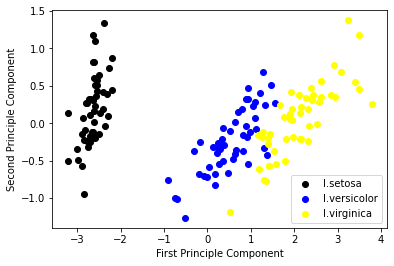

In [ ]:
from sklearn.datasets import load_iris
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets

def PCA_initialize():
  iris=load_iris()
  features=iris.data
  labels=iris.target

  iris = datasets.load_iris()

  y = iris.target

  labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']

  
  est=PCA(n_components=2)
  x_pca=est.fit_transform(features)

  colors=['black', 'blue','yellow']
  for i in range(len(colors)):
      px=x_pca[:,0][labels==i]
      py=x_pca[:,1][labels==i]
      plt.scatter(px, py, c=colors[i])
  plt.legend(labels_names)
  plt.xlabel('First Principle Component')
  plt.ylabel('Second Principle Component')
  plt.show()
  return x_pca,y
x_pca ,y= PCA_initialize()


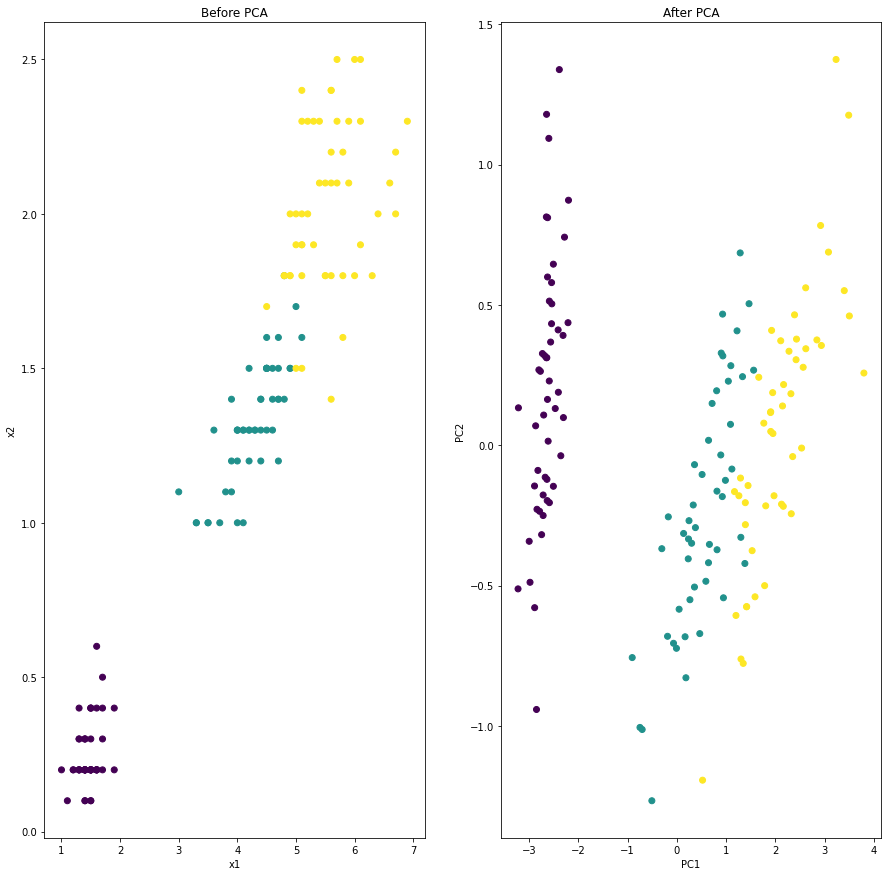

In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]

Y = iris.target
def before_and_after_PCA(x_pca):
  fig, axes = plt.subplots(1,2,figsize=(15,15))
  # fig.figure(figsize=(15,15))
  axes[0].scatter(X[:,0], X[:,1],c=y)
  axes[0].set_xlabel('x1')
  axes[0].set_ylabel('x2')
  axes[0].set_title('Before PCA')
  axes[1].scatter(x_pca[:,0], x_pca[:,1],c=y)
  axes[1].set_xlabel('PC1')
  axes[1].set_ylabel('PC2')
  axes[1].set_title('After PCA')
  plt.show()

before_and_after_PCA(x_pca)

In [ ]:
from sklearn.model_selection import train_test_split
def pca_train_test_data(x_pca):
  x_train, x_test, y_train, y_test = train_test_split(
      x_pca, labels, test_size=0.4, random_state=33)
  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = pca_train_test_data(x_pca)

In [ ]:
from sklearn.svm import SVC

def PCA_test(model):
  # clf=SVC()
  clf = model
  clf.fit(x_train, y_train)

  pred = clf.predict(x_test)


  from sklearn import metrics
  from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
  labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']
  print('Accuracy Score:', accuracy_score(y_test, pred))
  print('Confusion Matrix:\n', confusion_matrix(y_test, pred))
  print(metrics.classification_report(
      y_test, pred, target_names=labels_names))


m = SVC()
PCA_test(m)



Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[17  0  0]
 [ 0 20  0]
 [ 0  2 21]]
              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        17
I.versicolor       0.91      1.00      0.95        20
 I.virginica       1.00      0.91      0.95        23

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

